In [44]:
# %%
import numpy as np
import pandas as pd
import sys
import os
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [45]:

# –î–æ–±–∞–≤–ª—è–µ–º –ø—É—Ç—å –∫ –Ω–∞—à–µ–π –ø–µ—Å–æ—á–Ω–∏—Ü–µ –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
current_dir = os.getcwd()  # –ø—É—Ç—å –∫ notebooks
optimization_path = r"src"
if optimization_path not in sys.path:
    sys.path.append(optimization_path)

In [46]:
from src.spore_tree_config import SporeTreeConfig
from src.spore_tree import SporeTree
from src.pendulum import PendulumSystem
from src.visualize_spore_tree import visualize_spore_tree
from src.tree_evaluator import TreeEvaluator

In [47]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –ø–∞–ø–∫–∏ pairs_3 –ø–æ–∏–º–µ–Ω–Ω–æ
from src.pairs_3.complete_meeting_analysis import complete_meeting_analysis
from src.pairs_3.create_chronological_meetings import create_chronological_meetings
from src.pairs_3.optimize_grandchild_parent_distance import optimize_grandchild_parent_distance
from src.pairs_3.optimize_grandchild_pair_distance import optimize_grandchild_pair_distance

from src.pairs_3.extract_pairs_from_chronology import (
    extract_pairs_from_chronology,
    get_pair_details,
    analyze_pair_statistics,
    export_pairs_to_csv
)
from src.pairs_3.create_meeting_chronology import (
    create_meeting_chronology,
    export_chronology_to_csv,
    get_meeting_recommendations
)
from src.pairs_3.build_distance_tables import (
    build_grandchild_distance_tables,
    build_grandchild_parent_distance_tables
)
from src.pairs_3.compute_convergence_tables import (
    compute_distance_derivative_table,
    compute_grandchild_parent_convergence_table
)
from src.pairs_3.find_converging_pairs import (
    find_converging_grandchild_pairs,
    find_converging_grandchild_parent_pairs
)
from src.pairs_3.extract_optimal_dt_from_pairs import (
    extract_optimal_dt_from_pairs,
    create_optimized_tree_from_pairs,
    compare_trees_distances
)

In [48]:
def draw_rk(pendulum, state, control, N = 50, total_dt=0.01, show=False):
    poses = [state]
    dt = total_dt/N
    for i in range(1, N+1):
        poses.append(pendulum.step(poses[-1], control, dt))

    return np.array(poses)

In [49]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.1,
    max_control=2.0
)

init_position = np.array([np.pi , -1])

cfg = SporeTreeConfig(
    initial_position=init_position,
    dt_base=0.1,
    dt_grandchildren_factor=0.1,
    figure_size=(10, 10)
)
cfg.validate()

True

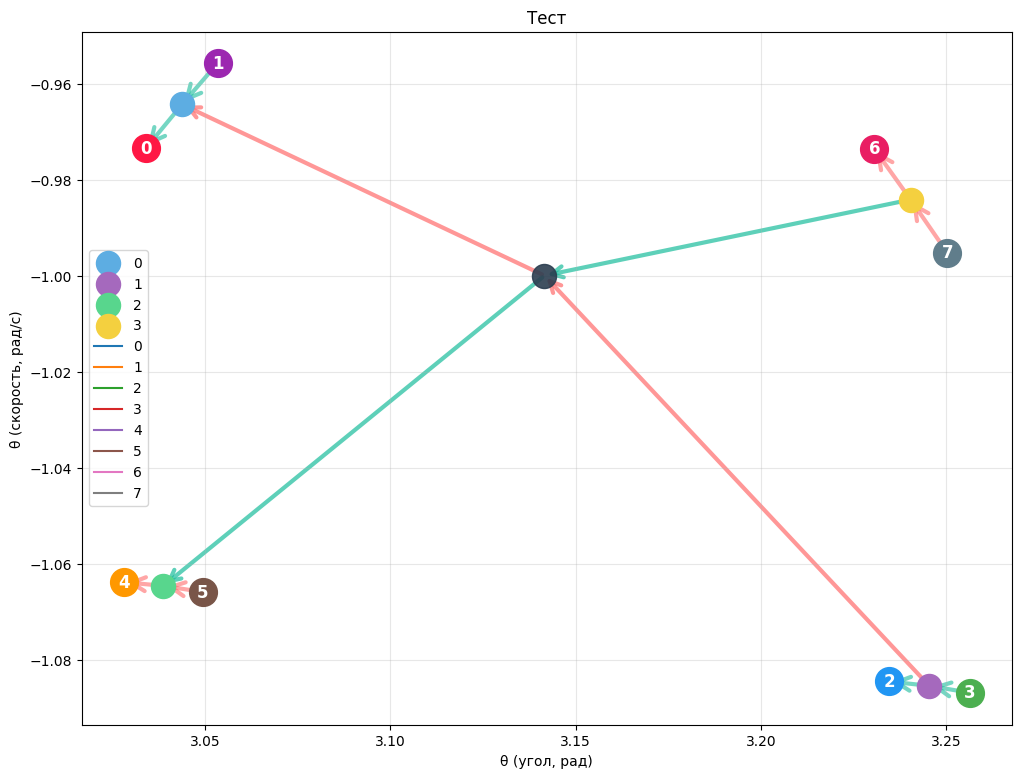

In [50]:
tree = SporeTree(pendulum, cfg)
children = tree.create_children(show=False)
grandchildren = tree.create_grandchildren(show=False)
tree.sort_and_pair_grandchildren()
tree.calculate_mean_points()

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. –ö—ç—à-–æ—Ü–µ–Ω—â–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
visualize_spore_tree(tree, "–¢–µ—Å—Ç")


poses = []
# dts = [0.01, 0.005, 0.003, 0.003, 0.01, 0.006, 0.003, 0.003]
dts = [1.5, -0.07897676, 0.07897674, -0.9, 0.00, 0.00, 0.00, 0.000] 
dts = np.array(dts) *0

for i in range(len(grandchildren)):
    parent_pos = children[grandchildren[i]['parent_idx']]['position']
    sign = grandchildren[i]['dt'] / grandchildren[i]['dt_abs']
    control = grandchildren[i]['control']
    poses_1 = draw_rk(pendulum, state=parent_pos, control=control, total_dt=dts[i])

    plt.plot(poses_1[:, 0], poses_1[:, 1], label=f'{i}')

plt.legend()


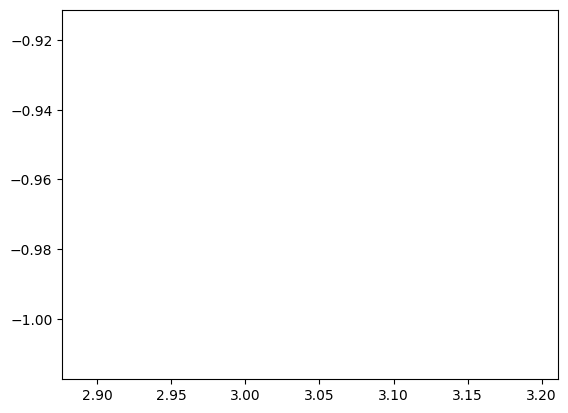

In [51]:
i = 1
parent_pos = children[grandchildren[i]['parent_idx']]['position']
sign = grandchildren[i]['dt'] / grandchildren[i]['dt_abs']
control = grandchildren[i]['control']
poses_1 = draw_rk(pendulum, state=parent_pos, control=control, total_dt=dts[i], show=True)

plt.plot(poses_1[:, 0], poses_1[:, 1])

In [52]:
tree.children[0]['dt']

0.1

In [53]:
# –Ø—á–µ–π–∫–∞ 1: –ü—Ä–æ–≤–µ—Ä—è–µ–º –±–∞–∑–æ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–µ—Ä–µ–≤–µ
print("=== –ë–ê–ó–û–í–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û –î–ï–†–ï–í–ï ===")
print(f"‚úÖ –î–µ—Ç–∏ —Å–æ–∑–¥–∞–Ω—ã: {tree._children_created}")
print(f"‚úÖ –í–Ω—É–∫–∏ —Å–æ–∑–¥–∞–Ω—ã: {tree._grandchildren_created}")
print(f"üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ç–µ–π: {len(tree.children)}")
print(f"üë∂ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–Ω—É–∫–æ–≤: {len(tree.grandchildren)}")

print(f"\nüìç –ö–æ—Ä–Ω–µ–≤–∞—è –ø–æ–∑–∏—Ü–∏—è: {tree.root['position']}")

print(f"\nüçÑ –î–ï–¢–ò:")
for i, child in enumerate(tree.children):
    direction = "forward" if child['dt'] > 0 else "backward"
    print(f"  {i}: {child['name']} - u={child['control']:+.1f}, dt={child['dt']:+.4f} ({direction})")
    print(f"      –ø–æ–∑–∏—Ü–∏—è: {child['position']}")

print(f"\nüë∂ –í–ù–£–ö–ò:")
for i, gc in enumerate(tree.grandchildren):
    direction = "forward" if gc['dt'] > 0 else "backward"
    print(f"  {i}: {gc['name']} - —Ä–æ–¥–∏—Ç–µ–ª—å_{gc['parent_idx']}, u={gc['control']:+.1f}, dt={gc['dt']:+.5f} ({direction})")
    print(f"      –ø–æ–∑–∏—Ü–∏—è: {gc['position']}")

# –ü–æ–¥—Å—á–µ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π –≤—Ä–µ–º–µ–Ω–∏
forward_count = sum(1 for gc in tree.grandchildren if gc['dt'] > 0)
backward_count = len(tree.grandchildren) - forward_count
print(f"\n‚è∞ –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ –≤–Ω—É–∫–æ–≤:")
print(f"  Forward: {forward_count}, Backward: {backward_count}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —è—á–µ–µ–∫
basic_tree_info = {
    'n_children': len(tree.children),
    'n_grandchildren': len(tree.grandchildren),
    'forward_gc_count': forward_count,
    'backward_gc_count': backward_count
}

=== –ë–ê–ó–û–í–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û –î–ï–†–ï–í–ï ===
‚úÖ –î–µ—Ç–∏ —Å–æ–∑–¥–∞–Ω—ã: True
‚úÖ –í–Ω—É–∫–∏ —Å–æ–∑–¥–∞–Ω—ã: True
üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ç–µ–π: 4
üë∂ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–Ω—É–∫–æ–≤: 8

üìç –ö–æ—Ä–Ω–µ–≤–∞—è –ø–æ–∑–∏—Ü–∏—è: [ 3.14159265 -1.        ]

üçÑ –î–ï–¢–ò:
  0: forw_max - u=+2.0, dt=+0.1000 (forward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.04377981 -0.96433522]
  1: back_max - u=+2.0, dt=-0.1000 (backward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.24543413 -1.08547853]
  2: forw_min - u=-2.0, dt=+0.1000 (forward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.03877602 -1.06464773]
  3: back_min - u=-2.0, dt=-0.1000 (backward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.24039701 -0.98415791]

üë∂ –í–ù–£–ö–ò:
  0: gc_0_0_forward - —Ä–æ–¥–∏—Ç–µ–ª—å_0, u=-2.0, dt=+0.01000 (forward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.03409156 -0.97339249]
  1: gc_0_1_backward - —Ä–æ–¥–∏—Ç–µ–ª—å_0, u=-2.0, dt=-0.01000 (backward)
      –ø–æ–∑–∏—Ü–∏—è: [ 3.0533798  -0.95573988]
  2: gc_1_0_forward - —Ä–æ–¥–∏—Ç–µ–ª—å_1, u=-2.0, dt=+0.01000 (forward)
 

In [54]:
# –Ø—á–µ–π–∫–∞ 2: –í—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—ã —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è
from src.pairs_3.compute_convergence_tables import compute_distance_derivative_table, compute_grandchild_parent_convergence_table

print("=== –¢–ê–ë–õ–ò–¶–´ –°–ö–û–†–û–°–¢–ï–ô –°–ë–õ–ò–ñ–ï–ù–ò–Ø ===")

print("\nüîπ –°–∫–æ—Ä–æ—Å—Ç–∏ —Å–±–ª–∏–∂–µ–Ω–∏—è –í–ù–£–ö-–í–ù–£–ö:")
convergence_gc_gc = compute_distance_derivative_table(tree.grandchildren, pendulum, show=True)

print("\nüîπ –°–∫–æ—Ä–æ—Å—Ç–∏ —Å–±–ª–∏–∂–µ–Ω–∏—è –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
convergence_gc_parent = compute_grandchild_parent_convergence_table(tree.grandchildren, tree.children, pendulum, show=True)

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
import numpy as np

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤–Ω—É–∫-–≤–Ω—É–∫
gc_gc_values = convergence_gc_gc.values
upper_triangle = np.triu(gc_gc_values, k=1)  # –¢–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫
valid_values = upper_triangle[upper_triangle != 0]

gc_gc_converging = (valid_values < -1e-6).sum()
gc_gc_diverging = (valid_values > 1e-6).sum()
gc_gc_stationary = len(valid_values) - gc_gc_converging - gc_gc_diverging

print(f"\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –í–ù–£–ö-–í–ù–£–ö:")
print(f"  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {gc_gc_converging}")
print(f"  –†–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {gc_gc_diverging}")
print(f"  –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –ø–∞—Ä: {gc_gc_stationary}")
print(f"  –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–∞—Ä: {len(valid_values)}")

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å
gc_parent_values = convergence_gc_parent.values[~np.isnan(convergence_gc_parent.values)]
gc_parent_converging = (gc_parent_values < -1e-6).sum()
gc_parent_diverging = (gc_parent_values > 1e-6).sum()
gc_parent_stationary = len(gc_parent_values) - gc_parent_converging - gc_parent_diverging

print(f"\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
print(f"  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {gc_parent_converging}")
print(f"  –†–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {gc_parent_diverging}")
print(f"  –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –ø–∞—Ä: {gc_parent_stationary}")
print(f"  –í—Å–µ–≥–æ —Å–≤—è–∑–µ–π: {len(gc_parent_values)}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —è—á–µ–µ–∫
convergence_data = {
    'gc_gc_table': convergence_gc_gc,
    'gc_parent_table': convergence_gc_parent,
    'gc_gc_converging_count': gc_gc_converging,
    'gc_parent_converging_count': gc_parent_converging
}

=== –¢–ê–ë–õ–ò–¶–´ –°–ö–û–†–û–°–¢–ï–ô –°–ë–õ–ò–ñ–ï–ù–ò–Ø ===

üîπ –°–∫–æ—Ä–æ—Å—Ç–∏ —Å–±–ª–∏–∂–µ–Ω–∏—è –í–ù–£–ö-–í–ù–£–ö:
–û—Ç–ª–∞–¥–æ—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–µ—Ä–≤—ã—Ö 3 –≤–Ω—É–∫–æ–≤:
  –í–Ω—É–∫ 0: dt=+0.01000 (forward)
    raw_dynamics=[-0.97339249 -0.9289386 ], time_direction=+1
  –í–Ω—É–∫ 1: dt=-0.01000 (backward)
    raw_dynamics=[-0.95573988 -0.83654911], time_direction=-1
  –í–Ω—É–∫ 2: dt=+0.01000 (forward)
    raw_dynamics=[-1.08457406  0.06392436], time_direction=+1
–¢–∞–±–ª–∏—Ü–∞ –ø–µ—Ä–≤—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j|:
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3     gc_4     gc_5     gc_6     gc_7
gc_0  0.00000  2.61505 -0.57874  1.48949 -0.97194 -0.42994 -0.00206  1.97903
gc_1  2.61505  0.00000 -1.21516  0.65665  1.22407  0.98713 -1.93934  0.42570
gc_2 -0.5787

In [55]:
# –Ø—á–µ–π–∫–∞ 3: –ù–∞—Ö–æ–¥–∏–º —Å–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã
from src.pairs_3.find_converging_pairs import find_converging_grandchild_pairs, find_converging_grandchild_parent_pairs

print("=== –ü–û–ò–°–ö –°–ë–õ–ò–ñ–ê–Æ–©–ò–•–°–Ø –ü–ê–† ===")

print("\nüîπ –°–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã –í–ù–£–ö-–í–ù–£–ö:")
converging_gc_pairs = find_converging_grandchild_pairs(convergence_data['gc_gc_table'], show=True)

print("\nüîπ –°–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
converging_gc_parent_pairs = find_converging_grandchild_parent_pairs(convergence_data['gc_parent_table'], show=True)

# –î–µ—Ç–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –ø–∞—Ä
print(f"\nüìã –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ü–ê–† –í–ù–£–ö-–í–ù–£–ö:")
for i, pair in enumerate(converging_gc_pairs):
    gc_i = tree.grandchildren[pair['gc_i']]
    gc_j = tree.grandchildren[pair['gc_j']]
    print(f"  {i+1}. {pair['pair_name']} (—Å–∫–æ—Ä–æ—Å—Ç—å: {pair['velocity']:.6f})")
    print(f"     gc_{pair['gc_i']}: —Ä–æ–¥–∏—Ç–µ–ª—å_{gc_i['parent_idx']}, dt={gc_i['dt']:+.5f}")
    print(f"     gc_{pair['gc_j']}: —Ä–æ–¥–∏—Ç–µ–ª—å_{gc_j['parent_idx']}, dt={gc_j['dt']:+.5f}")
    print(f"     –û–¥–∏–Ω —Ä–æ–¥–∏—Ç–µ–ª—å: {'–î–ê' if gc_i['parent_idx'] == gc_j['parent_idx'] else '–ù–ï–¢'}")

print(f"\nüìã –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ü–ê–† –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
for i, pair in enumerate(converging_gc_parent_pairs):
    gc = tree.grandchildren[pair['gc_idx']]
    parent = tree.children[pair['parent_idx']]
    print(f"  {i+1}. {pair['pair_name']} (—Å–∫–æ—Ä–æ—Å—Ç—å: {pair['velocity']:.6f})")
    print(f"     gc_{pair['gc_idx']}: —Ä–æ–¥–∏—Ç–µ–ª—å_{gc['parent_idx']}, dt={gc['dt']:+.5f}")
    print(f"     target_parent_{pair['parent_idx']}: dt={parent['dt']:+.5f}")
    print(f"     –ö —Å–≤–æ–µ–º—É —Ä–æ–¥–∏—Ç–µ–ª—é: {'–î–ê' if gc['parent_idx'] == pair['parent_idx'] else '–ù–ï–¢'}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –æ–∂–∏–¥–∞–Ω–∏—è vs —Ä–µ–∞–ª—å–Ω–æ—Å—Ç—å
expected_gc_pairs = convergence_data['gc_gc_converging_count']
found_gc_pairs = len(converging_gc_pairs)
expected_gc_parent_pairs = convergence_data['gc_parent_converging_count']
found_gc_parent_pairs = len(converging_gc_parent_pairs)

print(f"\n‚úÖ –ü–†–û–í–ï–†–ö–ê –°–û–û–¢–í–ï–¢–°–¢–í–ò–Ø:")
print(f"  –í–Ω—É–∫-–≤–Ω—É–∫: –æ–∂–∏–¥–∞–ª–∏ {expected_gc_pairs}, –Ω–∞—à–ª–∏ {found_gc_pairs} {'‚úÖ' if expected_gc_pairs == found_gc_pairs else '‚ùå'}")
print(f"  –í–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å: –æ–∂–∏–¥–∞–ª–∏ {expected_gc_parent_pairs}, –Ω–∞—à–ª–∏ {found_gc_parent_pairs} {'‚úÖ' if expected_gc_parent_pairs == found_gc_parent_pairs else '‚ùå'}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —è—á–µ–µ–∫
pairs_data = {
    'converging_gc_pairs': converging_gc_pairs,
    'converging_gc_parent_pairs': converging_gc_parent_pairs,
    'expected_vs_found': {
        'gc_expected': expected_gc_pairs,
        'gc_found': found_gc_pairs,
        'gc_parent_expected': expected_gc_parent_pairs,
        'gc_parent_found': found_gc_parent_pairs
    }
}

=== –ü–û–ò–°–ö –°–ë–õ–ò–ñ–ê–Æ–©–ò–•–°–Ø –ü–ê–† ===

üîπ –°–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã –í–ù–£–ö-–í–ù–£–ö:
–ù–∞–π–¥–µ–Ω–æ 12 —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä –≤–Ω—É–∫–æ–≤:
  gc_2-gc_5: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -2.161643
  gc_1-gc_6: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -1.939335
  gc_5-gc_6: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -1.277252
  gc_1-gc_2: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -1.215159
  gc_0-gc_4: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.971942
  gc_3-gc_7: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.953531
  gc_2-gc_7: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.817362
  gc_0-gc_2: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.578736
  gc_0-gc_5: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.429943
  gc_5-gc_7: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.390950
  gc_2-gc_4: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.021876
  gc_0-gc_6: —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è = -0.002060

üîπ –°–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:
–ù–∞–π–¥–µ–Ω–æ 11 —Å–±–ª–∏–

In [56]:
# –Ø—á–µ–π–∫–∞ 4: –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä —Å –¥–µ—Ç–∞–ª—å–Ω—ã–º –¥–µ–±–∞–≥–æ–º


print("=== –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø –ü–ê–† ===")

dt_bounds = (0.001, 0.1)

# –í—ã—á–∏—Å–ª—è–µ–º distance constraint –¥–ª—è —Å–ø—Ä–∞–≤–∫–∏
parent_distances = []
for parent in tree.children:
    distance = np.linalg.norm(parent['position'] - tree.root['position'])
    parent_distances.append(distance)
min_parent_distance = min(parent_distances)
distance_constraint = min_parent_distance / 10.0

print(f"üìè Distance constraint: {distance_constraint:.5f} (1/10 –æ—Ç –º–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∫–æ—Ä–µ–Ω—å-—Ä–æ–¥–∏—Ç–µ–ª–∏: {min_parent_distance:.5f})")

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä –≤–Ω—É–∫-–≤–Ω—É–∫
print(f"\nüîπ –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø {len(pairs_data['converging_gc_pairs'])} –ü–ê–† –í–ù–£–ö-–í–ù–£–ö:")
gc_gc_optimization_results = {}

for i, pair in enumerate(pairs_data['converging_gc_pairs']):
    gc_i_idx = pair['gc_i']
    gc_j_idx = pair['gc_j']
    pair_name = pair['pair_name']
    
    print(f"\n  üìç –ü–∞—Ä–∞ {i+1}: {pair_name}")
    print(f"    –°–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {pair['velocity']:.6f}")
    
    result = optimize_grandchild_pair_distance(
        gc_i_idx, gc_j_idx, 
        tree.grandchildren, tree.children, pendulum,
        root_position=tree.root['position'],
        show=True  # –í–∫–ª—é—á–∞–µ–º –¥–µ—Ç–∞–ª—å–Ω—ã–π –¥–µ–±–∞–≥
    )
    
    gc_gc_optimization_results[pair_name] = result
    
    if result['success']:
        passes_constraint = result.get('passes_constraint', True)
        print(f"    ‚úÖ –£–°–ü–ï–•: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ={result['min_distance']:.6f}")
        print(f"    üìä –ü—Ä–æ—Ö–æ–¥–∏—Ç constraint: {'–î–ê' if passes_constraint else '–ù–ï–¢'}")
        if not passes_constraint:
            print(f"    ‚ö†Ô∏è  –û–¢–°–ï–ß–ï–ù–û –ü–û CONSTRAINT!")
    else:
        print(f"    ‚ùå –ù–ï–£–î–ê–ß–ê: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ —Å–æ—à–ª–∞—Å—å")
        if 'error' in result:
            print(f"    –ü—Ä–∏—á–∏–Ω–∞: {result['error']}")

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å
print(f"\nüîπ –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø {len(pairs_data['converging_gc_parent_pairs'])} –ü–ê–† –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
gc_parent_optimization_results = {}

for i, pair in enumerate(pairs_data['converging_gc_parent_pairs']):
    gc_idx = pair['gc_idx']
    parent_idx = pair['parent_idx']
    pair_name = pair['pair_name']
    
    print(f"\n  üìç –ü–∞—Ä–∞ {i+1}: {pair_name}")
    print(f"    –°–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {pair['velocity']:.6f}")
    
    result = optimize_grandchild_parent_distance(
        gc_idx, parent_idx,
        tree.grandchildren, tree.children, pendulum,
        dt_bounds=dt_bounds, show=True  # –í–∫–ª—é—á–∞–µ–º –¥–µ—Ç–∞–ª—å–Ω—ã–π –¥–µ–±–∞–≥
    )
    
    gc_parent_optimization_results[pair_name] = result
    
    if result['success']:
        print(f"    ‚úÖ –£–°–ü–ï–•: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ={result['min_distance']:.6f}")
    else:
        print(f"    ‚ùå –ù–ï–£–î–ê–ß–ê: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ —Å–æ—à–ª–∞—Å—å")
        if 'error' in result:
            print(f"    –ü—Ä–∏—á–∏–Ω–∞: {result['error']}")

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
gc_gc_success = sum(1 for r in gc_gc_optimization_results.values() if r['success'])
gc_gc_constraint_pass = sum(1 for r in gc_gc_optimization_results.values() 
                           if r['success'] and r.get('passes_constraint', True))

gc_parent_success = sum(1 for r in gc_parent_optimization_results.values() if r['success'])

print(f"\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–ò:")
print(f"  –í–Ω—É–∫-–≤–Ω—É–∫: {gc_gc_success}/{len(pairs_data['converging_gc_pairs'])} —É—Å–ø–µ—à–Ω—ã—Ö")
print(f"  –í–Ω—É–∫-–≤–Ω—É–∫ –ø—Ä–æ—à–ª–∏ constraint: {gc_gc_constraint_pass}/{gc_gc_success}")
print(f"  –í–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å: {gc_parent_success}/{len(pairs_data['converging_gc_parent_pairs'])} —É—Å–ø–µ—à–Ω—ã—Ö")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —è—á–µ–µ–∫
optimization_data = {
    'gc_gc_results': gc_gc_optimization_results,
    'gc_parent_results': gc_parent_optimization_results,
    'distance_constraint': distance_constraint,
    'stats': {
        'gc_gc_success': gc_gc_success,
        'gc_gc_constraint_pass': gc_gc_constraint_pass,
        'gc_parent_success': gc_parent_success
    }
}

=== –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø –ü–ê–† ===
üìè Distance constraint: 0.01001 (1/10 –æ—Ç –º–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∫–æ—Ä–µ–Ω—å-—Ä–æ–¥–∏—Ç–µ–ª–∏: 0.10007)

üîπ –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø 12 –ü–ê–† –í–ù–£–ö-–í–ù–£–ö:

  üìç –ü–∞—Ä–∞ 1: gc_2-gc_5
    –°–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: -2.161643
    Distance constraint: 0.01001 (1/10 –æ—Ç –º–∏–Ω. —Ä–∞—Å—Å—Ç. –∫–æ—Ä–µ–Ω—å-—Ä–æ–¥–∏—Ç–µ–ª–∏: 0.10007)
    üìä –í—Ä–µ–º–µ–Ω–∞ —Ä–æ–¥–∏—Ç–µ–ª–µ–π: ['0.10000', '0.10000', '0.10000', '0.10000']
    üìä –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –≤—Ä–µ–º—è —Ä–æ–¥–∏—Ç–µ–ª—è: 0.10000
    üìä –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã dt: (0.001, 0.20000)
    –í–Ω—É–∫ i (gc_2): original_dt=+0.01000 (forward)
    –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è i: dt ‚àà [0.001, 0.200]
    –í–Ω—É–∫ j (gc_5): original_dt=-0.01000 (backward)
    –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è j: dt ‚àà [-0.200, -0.001]
    –ù–∞—á–∞–ª—å–Ω–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ: dt_i=0.101, dt_j=-0.101
    –ù–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.011197
    –ú–µ—Ç–æ–¥ L-BFGS-B: success=False,

In [57]:
# –Ø—á–µ–π–∫–∞ 5: –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤—ã—Ö —Ç–∞–±–ª–∏—Ü —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –∏ –≤—Ä–µ–º–µ–Ω
import pandas as pd
import numpy as np

print("=== –ü–û–°–¢–†–û–ï–ù–ò–ï –ò–¢–û–ì–û–í–´–• –¢–ê–ë–õ–ò–¶ ===")

n_gc = len(tree.grandchildren)
n_parents = len(tree.children)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—ã NaN
gc_gc_distance_table = np.full((n_gc, n_gc), np.nan)
gc_gc_time_i_table = np.full((n_gc, n_gc), np.nan)
gc_gc_time_j_table = np.full((n_gc, n_gc), np.nan)

gc_parent_distance_table = np.full((n_gc, n_parents), np.nan)
gc_parent_time_table = np.full((n_gc, n_parents), np.nan)

print(f"üîπ –ó–ê–ü–û–õ–ù–ï–ù–ò–ï –¢–ê–ë–õ–ò–¶ –í–ù–£–ö-–í–ù–£–ö:")
filled_gc_gc = 0

for pair_name, result in optimization_data['gc_gc_results'].items():
    # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∏–∑ –∏–º–µ–Ω–∏ –ø–∞—Ä—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä "gc_0-gc_3")
    parts = pair_name.split('-')
    gc_i_idx = int(parts[0].split('_')[1])
    gc_j_idx = int(parts[1].split('_')[1])
    
    print(f"  üìç {pair_name}: success={result['success']}", end="")
    
    if result['success']:
        passes_constraint = result.get('passes_constraint', True)
        print(f", passes_constraint={passes_constraint}")
        
        if passes_constraint:
            # –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã
            gc_gc_distance_table[gc_i_idx, gc_j_idx] = result['min_distance']
            gc_gc_distance_table[gc_j_idx, gc_i_idx] = result['min_distance']
            
            gc_gc_time_i_table[gc_i_idx, gc_j_idx] = result['optimal_dt_i']
            gc_gc_time_j_table[gc_i_idx, gc_j_idx] = result['optimal_dt_j']
            gc_gc_time_i_table[gc_j_idx, gc_i_idx] = result['optimal_dt_j']
            gc_gc_time_j_table[gc_j_idx, gc_i_idx] = result['optimal_dt_i']
            
            filled_gc_gc += 1
            print(f"    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ={result['min_distance']:.6f}")
        else:
            print(f"    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –Ω–µ –ø—Ä–æ—à–ª–æ constraint")
    else:
        print(f"    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞")

print(f"\nüîπ –ó–ê–ü–û–õ–ù–ï–ù–ò–ï –¢–ê–ë–õ–ò–¶ –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
filled_gc_parent = 0

for pair_name, result in optimization_data['gc_parent_results'].items():
    # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∏–∑ –∏–º–µ–Ω–∏ –ø–∞—Ä—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä "gc_2-parent_1")
    parts = pair_name.split('-')
    gc_idx = int(parts[0].split('_')[1])
    parent_idx = int(parts[1].split('_')[1])
    
    print(f"  üìç {pair_name}: success={result['success']}")
    
    if result['success']:
        gc_parent_distance_table[gc_idx, parent_idx] = result['min_distance']
        gc_parent_time_table[gc_idx, parent_idx] = result['optimal_dt']
        filled_gc_parent += 1
        print(f"    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ={result['min_distance']:.6f}")
    else:
        print(f"    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞")

# –°–æ–∑–¥–∞–µ–º DataFrame
row_names_gc = [f"gc_{i}" for i in range(n_gc)]
col_names_gc = [f"gc_{i}" for i in range(n_gc)]
col_names_parent = [f"parent_{i}" for i in range(n_parents)]

distance_gc_gc_df = pd.DataFrame(gc_gc_distance_table, index=row_names_gc, columns=col_names_gc)
time_i_gc_gc_df = pd.DataFrame(gc_gc_time_i_table, index=row_names_gc, columns=col_names_gc)
time_j_gc_gc_df = pd.DataFrame(gc_gc_time_j_table, index=row_names_gc, columns=col_names_gc)

distance_gc_parent_df = pd.DataFrame(gc_parent_distance_table, index=row_names_gc, columns=col_names_parent)
time_gc_parent_df = pd.DataFrame(gc_parent_time_table, index=row_names_gc, columns=col_names_parent)

print(f"\nüìä –ò–¢–û–ì–û–í–´–ï –¢–ê–ë–õ–ò–¶–´:")
print(f"  –í–Ω—É–∫-–≤–Ω—É–∫: –∑–∞–ø–æ–ª–Ω–µ–Ω–æ {filled_gc_gc} –∏–∑ {len(optimization_data['gc_gc_results'])} —è—á–µ–µ–∫")
print(f"  –í–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å: –∑–∞–ø–æ–ª–Ω–µ–Ω–æ {filled_gc_parent} –∏–∑ {len(optimization_data['gc_parent_results'])} —è—á–µ–µ–∫")

print(f"\nüìã –¢–ê–ë–õ–ò–¶–ê –†–ê–°–°–¢–û–Ø–ù–ò–ô –í–ù–£–ö-–í–ù–£–ö:")
with pd.option_context('display.precision', 6):
    print(distance_gc_gc_df)

print(f"\nüìã –¢–ê–ë–õ–ò–¶–ê –†–ê–°–°–¢–û–Ø–ù–ò–ô –í–ù–£–ö-–†–û–î–ò–¢–ï–õ–¨:")
with pd.option_context('display.precision', 6):
    print(distance_gc_parent_df)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —è—á–µ–µ–∫
tables_data = {
    'gc_gc_tables': {
        'distance_table': distance_gc_gc_df,
        'time_table_i': time_i_gc_gc_df,
        'time_table_j': time_j_gc_gc_df
    },
    'gc_parent_tables': {
        'distance_table': distance_gc_parent_df,
        'time_table': time_gc_parent_df
    },
    'filled_counts': {
        'gc_gc': filled_gc_gc,
        'gc_parent': filled_gc_parent
    }
}

=== –ü–û–°–¢–†–û–ï–ù–ò–ï –ò–¢–û–ì–û–í–´–• –¢–ê–ë–õ–ò–¶ ===
üîπ –ó–ê–ü–û–õ–ù–ï–ù–ò–ï –¢–ê–ë–õ–ò–¶ –í–ù–£–ö-–í–ù–£–ö:
  üìç gc_2-gc_5: success=True, passes_constraint=True
    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ=0.000000
  üìç gc_1-gc_6: success=True, passes_constraint=True
    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ=0.000000
  üìç gc_5-gc_6: success=False    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞
  üìç gc_1-gc_2: success=False    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞
  üìç gc_0-gc_4: success=True, passes_constraint=True
    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ=0.000000
  üìç gc_3-gc_7: success=True, passes_constraint=True
    ‚úÖ –ó–ê–ü–û–õ–ù–ï–ù–û: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ=0.000000
  üìç gc_2-gc_7: success=False    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞
  üìç gc_0-gc_2: success=False    ‚ùå –ü–†–û–ü–£–©–ï–ù–û: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—É–¥–∞—á–Ω–∞
  üìç gc_0-gc_5: success=False    

In [58]:
# –Ø—á–µ–π–∫–∞ 6: –°–æ–∑–¥–∞–Ω–∏–µ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏ –≤—Å—Ç—Ä–µ—á
import numpy as np

print("=== –°–û–ó–î–ê–ù–ò–ï –•–†–û–ù–û–õ–û–ì–ò–ò –í–°–¢–†–ï–ß ===")

chronology = {}

for gc_idx in range(len(tree.grandchildren)):
    meetings = []
    gc = tree.grandchildren[gc_idx]
    
    direction = "forward" if gc['dt'] > 0 else "backward"
    print(f"\nüîπ –í–Ω—É–∫ gc_{gc_idx} ({direction}):")
    
    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å—Ç—Ä–µ—á–∏ —Å –¥—Ä—É–≥–∏–º–∏ –≤–Ω—É–∫–∞–º–∏
    gc_meetings_count = 0
    for other_gc_idx in range(len(tree.grandchildren)):
        if gc_idx == other_gc_idx:
            continue
            
        distance = tables_data['gc_gc_tables']['distance_table'].iloc[gc_idx, other_gc_idx]
        if not np.isnan(distance):
            time_i = tables_data['gc_gc_tables']['time_table_i'].iloc[gc_idx, other_gc_idx]
            time_j = tables_data['gc_gc_tables']['time_table_j'].iloc[gc_idx, other_gc_idx]
            
            # –í—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏ = –º–∞–∫—Å–∏–º—É–º –∏–∑ –¥–≤—É—Ö –≤—Ä–µ–º–µ–Ω (–∫—Ç–æ-—Ç–æ –∂–¥–µ—Ç)
            meeting_time = max(abs(time_i), abs(time_j))
            
            meeting = {
                'type': 'grandchild',
                'partner': f"gc_{other_gc_idx}",
                'partner_idx': other_gc_idx,
                'distance': distance,
                'time_gc': time_i,
                'time_partner': time_j,
                'meeting_time': meeting_time,
                'who_waits': 'gc' if abs(time_i) > abs(time_j) else 'partner'
            }
            meetings.append(meeting)
            gc_meetings_count += 1
            
            print(f"    üë• –° gc_{other_gc_idx}: —Ä–∞—Å—Å—Ç={distance:.6f}, t_–≤—Å—Ç—Ä–µ—á–∏={meeting_time:.6f}—Å")
            print(f"       –≤—Ä–µ–º–µ–Ω–∞: gc={time_i:+.6f}—Å, –ø–∞—Ä—Ç–Ω–µ—Ä={time_j:+.6f}—Å, –∂–¥–µ—Ç={meeting['who_waits']}")
    
    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å—Ç—Ä–µ—á–∏ —Å —á—É–∂–∏–º–∏ —Ä–æ–¥–∏—Ç–µ–ª—è–º–∏
    parent_meetings_count = 0
    for parent_idx in range(len(tree.children)):
        if parent_idx == gc['parent_idx']:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
            continue
            
        distance = tables_data['gc_parent_tables']['distance_table'].iloc[gc_idx, parent_idx]
        if not np.isnan(distance):
            time_gc = tables_data['gc_parent_tables']['time_table'].iloc[gc_idx, parent_idx]
            
            meeting = {
                'type': 'parent',
                'partner': f"parent_{parent_idx}",
                'partner_idx': parent_idx,
                'distance': distance,
                'time_gc': time_gc,
                'time_partner': None,
                'meeting_time': abs(time_gc),
                'who_waits': None
            }
            meetings.append(meeting)
            parent_meetings_count += 1
            
            print(f"    üë®‚Äçüë¶ –° parent_{parent_idx}: —Ä–∞—Å—Å—Ç={distance:.6f}, t_–≤—Å—Ç—Ä–µ—á–∏={abs(time_gc):.6f}—Å")
            print(f"       –≤—Ä–µ–º—è gc: {time_gc:+.6f}—Å")
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å—Ç—Ä–µ—á–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –≤—Å—Ç—Ä–µ—á–∏ (–•–†–û–ù–û–õ–û–ì–ò–Ø!)
    meetings.sort(key=lambda x: x['meeting_time'])
    
    chronology[gc_idx] = meetings
    
    print(f"    üìä –ò—Ç–æ–≥–æ –≤—Å—Ç—Ä–µ—á: {len(meetings)} (–≤–Ω—É–∫–∏: {gc_meetings_count}, —Ä–æ–¥–∏—Ç–µ–ª–∏: {parent_meetings_count})")
    
    if meetings:
        print(f"    ‚è∞ –•—Ä–æ–Ω–æ–ª–æ–≥–∏—è (–ø–µ—Ä–≤—ã–µ 3):")
        for i, meeting in enumerate(meetings[:3]):
            print(f"      {i+1}. t={meeting['meeting_time']:.6f}—Å ‚Üí {meeting['partner']} (—Ä–∞—Å—Å—Ç={meeting['distance']:.6f})")

# –û–±—â–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
total_meetings = sum(len(meetings) for meetings in chronology.values())
gc_with_meetings = sum(1 for meetings in chronology.values() if meetings)

# –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –≤—Å—Ç—Ä–µ—á–∏ –≤–Ω—É–∫-–≤–Ω—É–∫ (–∏–∑–±–µ–≥–∞–µ–º –¥–≤–æ–π–Ω–æ–≥–æ –ø–æ–¥—Å—á–µ—Ç–∞)
unique_gc_meetings = sum(len([m for m in meetings if m['type'] == 'grandchild']) 
                        for meetings in chronology.values()) // 2

total_parent_meetings = sum(len([m for m in meetings if m['type'] == 'parent']) 
                           for meetings in chronology.values())

print(f"\nüìä –û–ë–©–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê –•–†–û–ù–û–õ–û–ì–ò–ò:")
print(f"  –í—Å–µ–≥–æ –≤–Ω—É–∫–æ–≤: {len(tree.grandchildren)}")
print(f"  –í–Ω—É–∫–æ–≤ —Å –≤—Å—Ç—Ä–µ—á–∞–º–∏: {gc_with_meetings}")
print(f"  –£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-–≤–Ω—É–∫: {unique_gc_meetings}")
print(f"  –í—Å—Ç—Ä–µ—á –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å: {total_parent_meetings}")
print(f"  –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏: {total_meetings}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —Å —Ç–∞–±–ª–∏—Ü–∞–º–∏
expected_gc_meetings = tables_data['filled_counts']['gc_gc']
expected_parent_meetings = tables_data['filled_counts']['gc_parent']

print(f"\n‚úÖ –ü–†–û–í–ï–†–ö–ê –°–û–û–¢–í–ï–¢–°–¢–í–ò–Ø –° –¢–ê–ë–õ–ò–¶–ê–ú–ò:")
print(f"  –í–Ω—É–∫-–≤–Ω—É–∫: –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö {expected_gc_meetings}, –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏ {unique_gc_meetings} {'‚úÖ' if expected_gc_meetings == unique_gc_meetings else '‚ùå'}")
print(f"  –í–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å: –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö {expected_parent_meetings}, –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏ {total_parent_meetings} {'‚úÖ' if expected_parent_meetings == total_parent_meetings else '‚ùå'}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
final_chronology_data = {
    'chronology': chronology,
    'stats': {
        'total_meetings': total_meetings,
        'gc_with_meetings': gc_with_meetings,
        'unique_gc_meetings': unique_gc_meetings,
        'total_parent_meetings': total_parent_meetings
    }
}

=== –°–û–ó–î–ê–ù–ò–ï –•–†–û–ù–û–õ–û–ì–ò–ò –í–°–¢–†–ï–ß ===

üîπ –í–Ω—É–∫ gc_0 (forward):
    üë• –° gc_4: —Ä–∞—Å—Å—Ç=0.000000, t_–≤—Å—Ç—Ä–µ—á–∏=0.100194—Å
       –≤—Ä–µ–º–µ–Ω–∞: gc=+0.100194—Å, –ø–∞—Ä—Ç–Ω–µ—Ä=+0.090749—Å, –∂–¥–µ—Ç=gc
    üë®‚Äçüë¶ –° parent_2: —Ä–∞—Å—Å—Ç=0.066683, t_–≤—Å—Ç—Ä–µ—á–∏=0.055252—Å
       –≤—Ä–µ–º—è gc: +0.055252—Å
    üìä –ò—Ç–æ–≥–æ –≤—Å—Ç—Ä–µ—á: 2 (–≤–Ω—É–∫–∏: 1, —Ä–æ–¥–∏—Ç–µ–ª–∏: 1)
    ‚è∞ –•—Ä–æ–Ω–æ–ª–æ–≥–∏—è (–ø–µ—Ä–≤—ã–µ 3):
      1. t=0.055252—Å ‚Üí parent_2 (—Ä–∞—Å—Å—Ç=0.066683)
      2. t=0.100194—Å ‚Üí gc_4 (—Ä–∞—Å—Å—Ç=0.000000)

üîπ –í–Ω—É–∫ gc_1 (backward):
    üë• –° gc_6: —Ä–∞—Å—Å—Ç=0.000000, t_–≤—Å—Ç—Ä–µ—á–∏=0.105598—Å
       –≤—Ä–µ–º–µ–Ω–∞: gc=-0.105588—Å, –ø–∞—Ä—Ç–Ω–µ—Ä=+0.105598—Å, –∂–¥–µ—Ç=partner
    üë®‚Äçüë¶ –° parent_1: —Ä–∞—Å—Å—Ç=0.216214, t_–≤—Å—Ç—Ä–µ—á–∏=0.100000—Å
       –≤—Ä–µ–º—è gc: -0.100000—Å
    üë®‚Äçüë¶ –° parent_3: —Ä–∞—Å—Å—Ç=0.134498, t_–≤—Å—Ç—Ä–µ—á–∏=0.100000—Å
       –≤—Ä–µ–º—è gc: -0.100000—Å
    üìä –ò—Ç–æ

In [59]:
# –Ø—á–µ–π–∫–∞ 7: –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø–∞—Ä –∏–∑ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏
from src.pairs_3.extract_pairs_from_chronology import extract_pairs_from_chronology

print("=== –ò–ó–í–õ–ï–ß–ï–ù–ò–ï –ü–ê–† –ò–ó –•–†–û–ù–û–õ–û–ì–ò–ò ===")

# –ò–∑–≤–ª–µ–∫–∞–µ–º –ø–∞—Ä—ã —Å –ø–æ–ª–Ω—ã–º –¥–µ–±–∞–≥–æ–º
extracted_pairs = extract_pairs_from_chronology(final_chronology_data['chronology'], show=True)

print(f"\nüîç –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ò–ó–í–õ–ï–ß–ï–ù–ù–´–• –ü–ê–†:")

for i, (gc_i, gc_j, meeting_info) in enumerate(extracted_pairs):
    gc_i_info = tree.grandchildren[gc_i]
    gc_j_info = tree.grandchildren[gc_j]
    
    direction_i = "forward" if gc_i_info['dt'] > 0 else "backward"
    direction_j = "forward" if gc_j_info['dt'] > 0 else "backward"
    
    print(f"\n  üìç –ü–∞—Ä–∞ {i+1}: gc_{gc_i} ‚Üî gc_{gc_j}")
    print(f"    –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è: {direction_i} ‚Üî {direction_j}")
    print(f"    –†–æ–¥–∏—Ç–µ–ª–∏: parent_{gc_i_info['parent_idx']} ‚Üî parent_{gc_j_info['parent_idx']}")
    print(f"    –û–¥–∏–Ω —Ä–æ–¥–∏—Ç–µ–ª—å: {'–î–ê' if gc_i_info['parent_idx'] == gc_j_info['parent_idx'] else '–ù–ï–¢'}")
    print(f"    –í—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏: {meeting_info['meeting_time']:.6f}—Å")
    print(f"    –í—Ä–µ–º–µ–Ω–∞ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–π: gc_{gc_i}={meeting_info['time_gc']:+.6f}—Å, gc_{gc_j}={meeting_info['time_partner']:+.6f}—Å")
    print(f"    –ö—Ç–æ –∂–¥–µ—Ç: {meeting_info['who_waits']}")
    print(f"    –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {meeting_info['distance']:.6f}")

# –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –ø–∞—Ä
if extracted_pairs:
    distances = [meeting['distance'] for _, _, meeting in extracted_pairs]
    times = [meeting['meeting_time'] for _, _, meeting in extracted_pairs]
    
    print(f"\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ö–ê–ß–ï–°–¢–í–ê –ü–ê–†:")
    print(f"  –í—Å–µ–≥–æ –ø–∞—Ä: {len(extracted_pairs)}")
    print(f"  –°—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.mean(distances):.6f}")
    print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.min(distances):.6f}")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.max(distances):.6f}")
    print(f"  –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏: {np.mean(times):.6f}—Å")
    print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏: {np.min(times):.6f}—Å")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏: {np.max(times):.6f}—Å")
    
    # –ö–∞—á–µ—Å—Ç–≤–æ —Å–±–ª–∏–∂–µ–Ω–∏—è
    ultra_close = sum(1 for d in distances if d < 1e-6)
    very_close = sum(1 for d in distances if d < 1e-5)
    close = sum(1 for d in distances if d < 1e-4)
    
    print(f"\n  –ö–∞—á–µ—Å—Ç–≤–æ —Å–±–ª–∏–∂–µ–Ω–∏—è:")
    print(f"    –£–ª—å—Ç—Ä–∞-–±–ª–∏–∑–∫–∏–µ (< 1e-6): {ultra_close}/{len(extracted_pairs)}")
    print(f"    –û—á–µ–Ω—å –±–ª–∏–∑–∫–∏–µ (< 1e-5): {very_close}/{len(extracted_pairs)}")
    print(f"    –ë–ª–∏–∑–∫–∏–µ (< 1e-4): {close}/{len(extracted_pairs)}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –ø–æ–∫—Ä—ã—Ç–∏–µ –≤–Ω—É–∫–æ–≤
paired_grandchildren = set()
for gc_i, gc_j, _ in extracted_pairs:
    paired_grandchildren.add(gc_i)
    paired_grandchildren.add(gc_j)

unpaired_grandchildren = [i for i in range(len(tree.grandchildren)) if i not in paired_grandchildren]

print(f"\nüë• –ü–û–ö–†–´–¢–ò–ï –í–ù–£–ö–û–í:")
print(f"  –í–Ω—É–∫–æ–≤ –≤ –ø–∞—Ä–∞—Ö: {len(paired_grandchildren)}")
print(f"  –í–Ω—É–∫–æ–≤ –±–µ–∑ –ø–∞—Ä: {len(unpaired_grandchildren)}")
if unpaired_grandchildren:
    print(f"  –ò–Ω–¥–µ–∫—Å—ã –Ω–µ—Å–ø–∞—Ä–µ–Ω–Ω—ã—Ö: {unpaired_grandchildren}")
    for gc_idx in unpaired_grandchildren:
        meetings_count = len(final_chronology_data['chronology'].get(gc_idx, []))
        print(f"    gc_{gc_idx}: {meetings_count} –≤—Å—Ç—Ä–µ—á –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏")

print(f"\nüèÅ –§–ò–ù–ê–õ–¨–ù–ê–Ø –ü–†–û–í–ï–†–ö–ê –ü–ê–ô–ü–õ–ê–ô–ù–ê:")
print(f"  ‚úÖ –î–µ—Ä–µ–≤–æ —Å–æ–∑–¥–∞–Ω–æ: {len(tree.grandchildren)} –≤–Ω—É–∫–æ–≤")
print(f"  ‚úÖ –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä –Ω–∞–π–¥–µ–Ω–æ: {len(pairs_data['converging_gc_pairs'])}")
print(f"  ‚úÖ –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —É—Å–ø–µ—à–Ω–∞: {optimization_data['stats']['gc_gc_constraint_pass']} –ø–∞—Ä")
print(f"  ‚úÖ –¢–∞–±–ª–∏—Ü—ã –∑–∞–ø–æ–ª–Ω–µ–Ω—ã: {tables_data['filled_counts']['gc_gc']} —è—á–µ–µ–∫")
print(f"  ‚úÖ –•—Ä–æ–Ω–æ–ª–æ–≥–∏—è —Å–æ–∑–¥–∞–Ω–∞: {final_chronology_data['stats']['unique_gc_meetings']} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á")
print(f"  ‚úÖ –ü–∞—Ä—ã –∏–∑–≤–ª–µ—á–µ–Ω—ã: {len(extracted_pairs)} —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä")

# –§–∏–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
final_results = {
    'tree': tree,
    'pairs': extracted_pairs,
    'chronology': final_chronology_data['chronology'],
    'tables': tables_data,
    'optimization': optimization_data
}

=== –ò–ó–í–õ–ï–ß–ï–ù–ò–ï –ü–ê–† –ò–ó –•–†–û–ù–û–õ–û–ì–ò–ò ===
–§–û–†–ú–ò–†–û–í–ê–ù–ò–ï –ü–ê–† –ü–û –£–ú–ù–û–ô –õ–û–ì–ò–ö–ï (–†–ê–°–°–¢–û–Ø–ù–ò–Ø < 1e-6 + –õ–£–ß–®–ò–ô –í–ù–£–ö)

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º gc_0:
  –í—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏: 2
  (–≤—Å—Ç—Ä–µ—á–∏ —Ç–æ–ª—å–∫–æ —Å –ß–£–ñ–ò–ú–ò —Ä–æ–¥–∏—Ç–µ–ª—è–º–∏ - —Å–≤–æ–∏ –∏—Å–∫–ª—é—á–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö)
    1. parent_2: —Ä–∞—Å—Å—Ç=0.06668326782195994, —Ç–∏–ø=parent
      ‚è© –ß—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å parent_2, –Ω–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ 0.06668326782195994 >= 1e-6, –ø—Ä–æ–¥–æ–ª–∂–∞–µ–º –ø–æ–∏—Å–∫
    2. gc_4: —Ä–∞—Å—Å—Ç=3.9177554120079184e-13, —Ç–∏–ø=grandchild
      üìù –û–±–Ω–æ–≤–∏–ª–∏ –ª—É—á—à–µ–≥–æ –≤–Ω—É–∫–∞: gc_4 (—Ä–∞—Å—Å—Ç=3.9177554120079184e-13)
      ‚úÖ –í–´–ë–†–ê–ù –°–†–ê–ó–£: –Ω–∞—à–ª–∏ –≤–Ω—É–∫–∞ gc_4 —Å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º 3.9177554120079184e-13 < 1e-6
  üéØ –†–ï–ó–£–õ–¨–¢–ê–¢: gc_0 + gc_4, t=0.10019411808795804—Å, —Ä–∞—Å—Å—Ç=3.9177554120079184e-13

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º gc_1:
  –í—Å–µ–≥–æ –

In [60]:


print("üöÄ –ó–ê–ü–£–°–ö –ü–û–õ–ù–û–ì–û –ü–ê–ô–ü–õ–ê–ô–ù–ê –í–°–¢–†–ï–ß...")

# ===============================================================================
# –≠–¢–ê–ü 1: –¢–∞–±–ª–∏—Ü—ã —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è
# ===============================================================================
print("1Ô∏è‚É£ –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è...", end=" ")

convergence_gc_gc = compute_distance_derivative_table(tree.grandchildren, pendulum, show=False)
convergence_gc_parent = compute_grandchild_parent_convergence_table(tree.grandchildren, tree.children, pendulum, show=False)

# –ë—ã—Å—Ç—Ä–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
gc_gc_values = convergence_gc_gc.values
upper_triangle = np.triu(gc_gc_values, k=1)
valid_values = upper_triangle[upper_triangle != 0]
gc_gc_converging_count = (valid_values < -1e-6).sum()

gc_parent_values = convergence_gc_parent.values[~np.isnan(convergence_gc_parent.values)]
gc_parent_converging_count = (gc_parent_values < -1e-6).sum()

print(f"‚úÖ ({gc_gc_converging_count} –ø–∞—Ä –≤–Ω—É–∫-–≤–Ω—É–∫, {gc_parent_converging_count} –ø–∞—Ä –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)")

# ===============================================================================
# –≠–¢–ê–ü 2: –ü–æ–∏—Å–∫ —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä
# ===============================================================================
print("2Ô∏è‚É£ –ü–æ–∏—Å–∫ —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä...", end=" ")

converging_gc_pairs = find_converging_grandchild_pairs(convergence_gc_gc, show=False)
converging_gc_parent_pairs = find_converging_grandchild_parent_pairs(convergence_gc_parent, show=False)

print(f"‚úÖ ({len(converging_gc_pairs)} –≤–Ω—É–∫-–≤–Ω—É–∫, {len(converging_gc_parent_pairs)} –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)")

# ===============================================================================
# –≠–¢–ê–ü 3: –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä (—Å –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–º–∏ –≥—Ä–∞–Ω–∏—Ü–∞–º–∏)
# ===============================================================================
print("3Ô∏è‚É£ –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä...", end=" ")

# Distance constraint
parent_distances = [np.linalg.norm(parent['position'] - tree.root['position']) for parent in tree.children]
min_parent_distance = min(parent_distances)
distance_constraint = min_parent_distance / 10.0

# –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã
parent_times = [abs(child['dt']) for child in tree.children]
max_parent_time = max(parent_times)
adaptive_dt_max = 2 * max_parent_time

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≤–Ω—É–∫-–≤–Ω—É–∫
gc_gc_optimization_results = {}
for pair in converging_gc_pairs:
    gc_i_idx = pair['gc_i']
    gc_j_idx = pair['gc_j']
    pair_name = pair['pair_name']
    
    result = optimize_grandchild_pair_distance(
        gc_i_idx, gc_j_idx, 
        tree.grandchildren, tree.children, pendulum,
        dt_bounds=None,  # –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã
        root_position=tree.root['position'],
        show=False
    )
    
    gc_gc_optimization_results[pair_name] = result

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å
gc_parent_optimization_results = {}
for pair in converging_gc_parent_pairs:
    gc_idx = pair['gc_idx']
    parent_idx = pair['parent_idx']
    pair_name = pair['pair_name']
    
    result = optimize_grandchild_parent_distance(
        gc_idx, parent_idx,
        tree.grandchildren, tree.children, pendulum,
        dt_bounds=None,  # –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã
        show=False
    )
    
    gc_parent_optimization_results[pair_name] = result

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
gc_gc_success = sum(1 for r in gc_gc_optimization_results.values() if r['success'])
gc_gc_constraint_pass = sum(1 for r in gc_gc_optimization_results.values() 
                           if r['success'] and r.get('passes_constraint', True))
gc_parent_success = sum(1 for r in gc_parent_optimization_results.values() if r['success'])

print(f"‚úÖ ({gc_gc_constraint_pass}/{len(converging_gc_pairs)} –≤–Ω—É–∫-–≤–Ω—É–∫ —É—Å–ø–µ—à–Ω–æ, {gc_parent_success}/{len(converging_gc_parent_pairs)} –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å —É—Å–ø–µ—à–Ω–æ)")

# ===============================================================================
# –≠–¢–ê–ü 4: –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü
# ===============================================================================
print("4Ô∏è‚É£ –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤—ã—Ö —Ç–∞–±–ª–∏—Ü...", end=" ")

n_gc = len(tree.grandchildren)
n_parents = len(tree.children)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—ã
gc_gc_distance_table = np.full((n_gc, n_gc), np.nan)
gc_gc_time_i_table = np.full((n_gc, n_gc), np.nan)
gc_gc_time_j_table = np.full((n_gc, n_gc), np.nan)
gc_parent_distance_table = np.full((n_gc, n_parents), np.nan)
gc_parent_time_table = np.full((n_gc, n_parents), np.nan)

# –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã –≤–Ω—É–∫-–≤–Ω—É–∫
filled_gc_gc = 0
for pair_name, result in gc_gc_optimization_results.items():
    if result['success'] and result.get('passes_constraint', True):
        # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∏–∑ –∏–º–µ–Ω–∏ –ø–∞—Ä—ã
        parts = pair_name.split('-')
        gc_i_idx = int(parts[0].split('_')[1])
        gc_j_idx = int(parts[1].split('_')[1])
        
        # –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã
        gc_gc_distance_table[gc_i_idx, gc_j_idx] = result['min_distance']
        gc_gc_distance_table[gc_j_idx, gc_i_idx] = result['min_distance']
        
        gc_gc_time_i_table[gc_i_idx, gc_j_idx] = result['optimal_dt_i']
        gc_gc_time_j_table[gc_i_idx, gc_j_idx] = result['optimal_dt_j']
        gc_gc_time_i_table[gc_j_idx, gc_i_idx] = result['optimal_dt_j']
        gc_gc_time_j_table[gc_j_idx, gc_i_idx] = result['optimal_dt_i']
        
        filled_gc_gc += 1

# –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å
filled_gc_parent = 0
for pair_name, result in gc_parent_optimization_results.items():
    if result['success']:
        # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∏–∑ –∏–º–µ–Ω–∏ –ø–∞—Ä—ã
        parts = pair_name.split('-')
        gc_idx = int(parts[0].split('_')[1])
        parent_idx = int(parts[1].split('_')[1])
        
        gc_parent_distance_table[gc_idx, parent_idx] = result['min_distance']
        gc_parent_time_table[gc_idx, parent_idx] = result['optimal_dt']
        filled_gc_parent += 1

# –°–æ–∑–¥–∞–µ–º DataFrame
row_names_gc = [f"gc_{i}" for i in range(n_gc)]
col_names_gc = [f"gc_{i}" for i in range(n_gc)]
col_names_parent = [f"parent_{i}" for i in range(n_parents)]

distance_gc_gc_df = pd.DataFrame(gc_gc_distance_table, index=row_names_gc, columns=col_names_gc)
time_i_gc_gc_df = pd.DataFrame(gc_gc_time_i_table, index=row_names_gc, columns=col_names_gc)
time_j_gc_gc_df = pd.DataFrame(gc_gc_time_j_table, index=row_names_gc, columns=col_names_gc)
distance_gc_parent_df = pd.DataFrame(gc_parent_distance_table, index=row_names_gc, columns=col_names_parent)
time_gc_parent_df = pd.DataFrame(gc_parent_time_table, index=row_names_gc, columns=col_names_parent)

print(f"‚úÖ ({filled_gc_gc} —è—á–µ–µ–∫ –≤–Ω—É–∫-–≤–Ω—É–∫, {filled_gc_parent} —è—á–µ–µ–∫ –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)")

# ===============================================================================
# –≠–¢–ê–ü 5: –°–æ–∑–¥–∞–Ω–∏–µ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏
# ===============================================================================
print("5Ô∏è‚É£ –°–æ–∑–¥–∞–Ω–∏–µ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏ –≤—Å—Ç—Ä–µ—á...", end=" ")

# –°–æ–∑–¥–∞–µ–º —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—é –∏–∑ —Ç–∞–±–ª–∏—Ü
chronology = {}

for gc_idx in range(len(tree.grandchildren)):
    meetings = []
    
    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å—Ç—Ä–µ—á–∏ —Å –¥—Ä—É–≥–∏–º–∏ –≤–Ω—É–∫–∞–º–∏
    for other_gc_idx in range(len(tree.grandchildren)):
        if gc_idx == other_gc_idx:
            continue
            
        distance = distance_gc_gc_df.iloc[gc_idx, other_gc_idx]
        if not np.isnan(distance):
            time_i = time_i_gc_gc_df.iloc[gc_idx, other_gc_idx]
            time_j = time_j_gc_gc_df.iloc[gc_idx, other_gc_idx]
            
            # –í—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏ = –º–∞–∫—Å–∏–º—É–º –∏–∑ –¥–≤—É—Ö –≤—Ä–µ–º–µ–Ω
            meeting_time = max(abs(time_i), abs(time_j))
            
            meeting = {
                'type': 'grandchild',
                'partner': f"gc_{other_gc_idx}",
                'partner_idx': other_gc_idx,
                'distance': distance,
                'time_gc': time_i,
                'time_partner': time_j,
                'meeting_time': meeting_time,
                'who_waits': 'gc' if abs(time_i) > abs(time_j) else 'partner'
            }
            meetings.append(meeting)
    
    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å—Ç—Ä–µ—á–∏ —Å —á—É–∂–∏–º–∏ —Ä–æ–¥–∏—Ç–µ–ª—è–º–∏
    for parent_idx in range(len(tree.children)):
        if parent_idx == tree.grandchildren[gc_idx]['parent_idx']:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
            continue
            
        distance = distance_gc_parent_df.iloc[gc_idx, parent_idx]
        if not np.isnan(distance):
            time_gc = time_gc_parent_df.iloc[gc_idx, parent_idx]
            
            meeting = {
                'type': 'parent',
                'partner': f"parent_{parent_idx}",
                'partner_idx': parent_idx,
                'distance': distance,
                'time_gc': time_gc,
                'time_partner': None,
                'meeting_time': abs(time_gc),
                'who_waits': None
            }
            meetings.append(meeting)
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å—Ç—Ä–µ—á–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –≤—Å—Ç—Ä–µ—á–∏ (–•–†–û–ù–û–õ–û–ì–ò–Ø!)
    meetings.sort(key=lambda x: x['meeting_time'])
    chronology[gc_idx] = meetings

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏
total_meetings = sum(len(meetings) for meetings in chronology.values())
unique_gc_meetings = sum(len([m for m in meetings if m['type'] == 'grandchild']) 
                        for meetings in chronology.values()) // 2
total_parent_meetings = sum(len([m for m in meetings if m['type'] == 'parent']) 
                           for meetings in chronology.values())

print(f"‚úÖ ({unique_gc_meetings} –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-–≤–Ω—É–∫, {total_parent_meetings} –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)")

# ===============================================================================
# –≠–¢–ê–ü 6: –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä
# ===============================================================================
print("6Ô∏è‚É£ –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø–∞—Ä –∏–∑ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏...", end=" ")

# –ò–∑–≤–ª–µ–∫–∞–µ–º –ø–∞—Ä—ã –ë–ï–ó –¥–µ–±–∞–≥–∞
final_pairs = extract_pairs_from_chronology(chronology, show=False)

print(f"‚úÖ ({len(final_pairs)} —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä)")

# ===============================================================================
# –ò–¢–û–ì–û–í–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê
# ===============================================================================
print("\n" + "="*60)
print("üèÅ –ü–ê–ô–ü–õ–ê–ô–ù –ó–ê–í–ï–†–®–ï–ù!")
print("="*60)

print(f"üìä –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã dt: (0.001, {adaptive_dt_max:.5f})")
print(f"üìè Distance constraint: {distance_constraint:.5f}")

print(f"\nüìà –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —ç—Ç–∞–ø–∞–º:")
print(f"  1Ô∏è‚É£ –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä –Ω–∞–π–¥–µ–Ω–æ: {len(converging_gc_pairs)} –≤–Ω—É–∫-–≤–Ω—É–∫ + {len(converging_gc_parent_pairs)} –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å")
print(f"  2Ô∏è‚É£ –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —É—Å–ø–µ—à–Ω–∞: {gc_gc_constraint_pass}/{len(converging_gc_pairs)} –≤–Ω—É–∫-–≤–Ω—É–∫ + {gc_parent_success}/{len(converging_gc_parent_pairs)} –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å")
print(f"  3Ô∏è‚É£ –¢–∞–±–ª–∏—Ü—ã –∑–∞–ø–æ–ª–Ω–µ–Ω—ã: {filled_gc_gc} —è—á–µ–µ–∫ –≤–Ω—É–∫-–≤–Ω—É–∫ + {filled_gc_parent} —è—á–µ–µ–∫ –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å")
print(f"  4Ô∏è‚É£ –•—Ä–æ–Ω–æ–ª–æ–≥–∏—è —Å–æ–∑–¥–∞–Ω–∞: {unique_gc_meetings} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-–≤–Ω—É–∫ + {total_parent_meetings} –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å")
print(f"  5Ô∏è‚É£ –§–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä –∏–∑–≤–ª–µ—á–µ–Ω–æ: {len(final_pairs)}")

# –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –ø–∞—Ä
if final_pairs:
    distances = [meeting['distance'] for _, _, meeting in final_pairs]
    times = [meeting['meeting_time'] for _, _, meeting in final_pairs]
    
    print(f"\nüéØ –ö–∞—á–µ—Å—Ç–≤–æ —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä:")
    print(f"  –°—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.mean(distances):.6f}")
    print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.min(distances):.6f}")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.max(distances):.6f}")
    print(f"  –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –≤—Å—Ç—Ä–µ—á–∏: {np.mean(times):.6f}—Å")
    
    # –ö–∞—á–µ—Å—Ç–≤–æ —Å–±–ª–∏–∂–µ–Ω–∏—è
    ultra_close = sum(1 for d in distances if d < 1e-6)
    very_close = sum(1 for d in distances if d < 1e-5)
    close = sum(1 for d in distances if d < 1e-4)
    
    print(f"  –£–ª—å—Ç—Ä–∞-–±–ª–∏–∑–∫–∏–µ (< 1e-6): {ultra_close}/{len(final_pairs)}")
    print(f"  –û—á–µ–Ω—å –±–ª–∏–∑–∫–∏–µ (< 1e-5): {very_close}/{len(final_pairs)}")
    print(f"  –ë–ª–∏–∑–∫–∏–µ (< 1e-4): {close}/{len(final_pairs)}")

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Å–∞–º–∏ –ø–∞—Ä—ã
print(f"\nüë• –§–ò–ù–ê–õ–¨–ù–´–ï –ü–ê–†–´:")
for i, (gc_i, gc_j, meeting_info) in enumerate(final_pairs):
    gc_i_info = tree.grandchildren[gc_i]
    gc_j_info = tree.grandchildren[gc_j]
    direction_i = "F" if gc_i_info['dt'] > 0 else "B"
    direction_j = "F" if gc_j_info['dt'] > 0 else "B"
    
    print(f"  {i+1}. gc_{gc_i}({direction_i}) ‚Üî gc_{gc_j}({direction_j}): "
          f"—Ä–∞—Å—Å—Ç={meeting_info['distance']:.6f}, t={meeting_info['meeting_time']:.6f}—Å")

print("="*60)

# –í–û–ó–í–†–ê–©–ê–ï–ú –†–ï–ó–£–õ–¨–¢–ê–¢
print("‚úÖ –ü–∞—Ä—ã –≥–æ—Ç–æ–≤—ã –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π final_pairs")

üöÄ –ó–ê–ü–£–°–ö –ü–û–õ–ù–û–ì–û –ü–ê–ô–ü–õ–ê–ô–ù–ê –í–°–¢–†–ï–ß...
1Ô∏è‚É£ –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è... ‚úÖ (12 –ø–∞—Ä –≤–Ω—É–∫-–≤–Ω—É–∫, 11 –ø–∞—Ä –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)
2Ô∏è‚É£ –ü–æ–∏—Å–∫ —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä... ‚úÖ (12 –≤–Ω—É–∫-–≤–Ω—É–∫, 11 –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)
3Ô∏è‚É£ –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä... ‚úÖ (4/12 –≤–Ω—É–∫-–≤–Ω—É–∫ —É—Å–ø–µ—à–Ω–æ, 11/11 –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å —É—Å–ø–µ—à–Ω–æ)
4Ô∏è‚É£ –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤—ã—Ö —Ç–∞–±–ª–∏—Ü... ‚úÖ (4 —è—á–µ–µ–∫ –≤–Ω—É–∫-–≤–Ω—É–∫, 11 —è—á–µ–µ–∫ –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)
5Ô∏è‚É£ –°–æ–∑–¥–∞–Ω–∏–µ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏ –≤—Å—Ç—Ä–µ—á... ‚úÖ (4 –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-–≤–Ω—É–∫, 11 –≤—Å—Ç—Ä–µ—á –≤–Ω—É–∫-—Ä–æ–¥–∏—Ç–µ–ª—å)
6Ô∏è‚É£ –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø–∞—Ä –∏–∑ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏–∏... ‚úÖ (4 —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–∞—Ä)

üèÅ –ü–ê–ô–ü–õ–ê–ô–ù –ó–ê–í–ï–†–®–ï–ù!
üìä –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã dt: (0.001, 0.20000)
üìè Distance constraint: 0.01001

üìà –†–µ–∑—É–ª—å—Ç–∞—Ç—ã 

In [61]:
# –ü—Ä–æ—Å—Ç–æ –∑–∞–ø—É—Å—Ç–∏ —è—á–µ–π–∫—É –∏ –ø–æ–ª—É—á–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
# –í –∫–æ–Ω—Ü–µ –±—É–¥–µ—Ç:
# final_pairs = [(gc_i, gc_j, meeting_info), ...]

# –î–∞–ª—å—à–µ –º–æ–∂–µ—à—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–∞—Ä—ã –∫–∞–∫ —É–≥–æ–¥–Ω–æ
for gc_i, gc_j, meeting in final_pairs:
    print(f"–ü–∞—Ä–∞ gc_{gc_i} - gc_{gc_j}, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {meeting['distance']}")

–ü–∞—Ä–∞ gc_0 - gc_4, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 3.9177554120079184e-13
–ü–∞—Ä–∞ gc_1 - gc_6, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 4.0173768000118137e-13
–ü–∞—Ä–∞ gc_2 - gc_5, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 2.3914935841127266e-15
–ü–∞—Ä–∞ gc_3 - gc_7, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.0


In [62]:
# –Ø—á–µ–π–∫–∞: –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö dt –∏–∑ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –ø–∞—Ä
import numpy as np

print("üîß –ò–ó–í–õ–ï–ß–ï–ù–ò–ï –û–ü–¢–ò–ú–ê–õ–¨–ù–´–• –í–†–ï–ú–ï–ù –ò–ó –ü–ê–†")
print("="*50)

# –ò—Å—Ö–æ–¥–Ω—ã–µ dt –¥–ª—è —Å–ø—Ä–∞–≤–∫–∏
original_dt_children = np.array([child['dt'] for child in tree.children])
original_dt_grandchildren = np.array([gc['dt'] for gc in tree.grandchildren])

print(f"üìä –ò—Å—Ö–æ–¥–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–∞:")
print(f"  –î–µ—Ç–∏: {[f'{dt:+.5f}' for dt in original_dt_children]}")
print(f"  –í–Ω—É–∫–∏: {[f'{dt:+.5f}' for dt in original_dt_grandchildren]}")

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
optimal_dt_children = original_dt_children.copy()
optimal_dt_grandchildren = original_dt_grandchildren.copy()

# –ú–∞–ø–ø–∏–Ω–≥ –ø–∞—Ä –∏ –∏–∑–º–µ–Ω–µ–Ω–∏–π
pair_mapping = {}
paired_grandchildren = set()

print(f"\nüîç –û–±—Ä–∞–±–æ—Ç–∫–∞ {len(final_pairs)} –ø–∞—Ä:")

for pair_idx, (gc_i, gc_j, meeting_info) in enumerate(final_pairs):
    # –ò–∑–≤–ª–µ–∫–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–∞ –∏–∑ –≤—Å—Ç—Ä–µ—á–∏
    optimal_dt_i = meeting_info['time_gc']      # –≤—Ä–µ–º—è –¥–ª—è gc_i
    optimal_dt_j = meeting_info['time_partner'] # –≤—Ä–µ–º—è –¥–ª—è gc_j
    
    # –û–±–Ω–æ–≤–ª—è–µ–º dt –¥–ª—è –≤–Ω—É–∫–æ–≤ –≤ –ø–∞—Ä–µ
    optimal_dt_grandchildren[gc_i] = optimal_dt_i
    optimal_dt_grandchildren[gc_j] = optimal_dt_j
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–∞–ø–ø–∏–Ω–≥ –¥–ª—è –æ—Ç—á–µ—Ç–∞
    pair_mapping[gc_i] = {
        'pair_idx': pair_idx,
        'partner': gc_j,
        'optimal_dt': optimal_dt_i,
        'original_dt': original_dt_grandchildren[gc_i],
        'meeting_distance': meeting_info['distance'],
        'meeting_time': meeting_info['meeting_time']
    }
    pair_mapping[gc_j] = {
        'pair_idx': pair_idx,
        'partner': gc_i,
        'optimal_dt': optimal_dt_j,
        'original_dt': original_dt_grandchildren[gc_j],
        'meeting_distance': meeting_info['distance'],
        'meeting_time': meeting_info['meeting_time']
    }
    
    # –û—Ç–º–µ—á–∞–µ–º –∫–∞–∫ —Å–ø–∞—Ä–µ–Ω–Ω—ã—Ö
    paired_grandchildren.add(gc_i)
    paired_grandchildren.add(gc_j)
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏—è
    change_i = abs(optimal_dt_i - original_dt_grandchildren[gc_i]) > 1e-10
    change_j = abs(optimal_dt_j - original_dt_grandchildren[gc_j]) > 1e-10
    
    print(f"  –ü–∞—Ä–∞ {pair_idx+1}: gc_{gc_i} ‚Üî gc_{gc_j}")
    print(f"    gc_{gc_i}: {original_dt_grandchildren[gc_i]:+.6f} ‚Üí {optimal_dt_i:+.6f} {'‚úèÔ∏è' if change_i else '‚ûñ'}")
    print(f"    gc_{gc_j}: {original_dt_grandchildren[gc_j]:+.6f} ‚Üí {optimal_dt_j:+.6f} {'‚úèÔ∏è' if change_j else '‚ûñ'}")
    print(f"    –í—Å—Ç—Ä–µ—á–∞: —Ä–∞—Å—Å—Ç={meeting_info['distance']:.6f}, –≤—Ä–µ–º—è={meeting_info['meeting_time']:.6f}—Å")

# –ù–∞—Ö–æ–¥–∏–º –Ω–µ—Å–ø–∞—Ä–µ–Ω–Ω—ã—Ö –≤–Ω—É–∫–æ–≤
unpaired_grandchildren = [i for i in range(len(tree.grandchildren)) if i not in paired_grandchildren]

print(f"\nüìã –ò–¢–û–ì–û–í–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê:")
print(f"  –°–ø–∞—Ä–µ–Ω–æ –≤–Ω—É–∫–æ–≤: {len(paired_grandchildren)}")
print(f"  –ù–µ—Å–ø–∞—Ä–µ–Ω–Ω—ã—Ö –≤–Ω—É–∫–æ–≤: {len(unpaired_grandchildren)}")
if unpaired_grandchildren:
    print(f"  –ò–Ω–¥–µ–∫—Å—ã –Ω–µ—Å–ø–∞—Ä–µ–Ω–Ω—ã—Ö: {unpaired_grandchildren}")

print(f"\nüìä –°–†–ê–í–ù–ï–ù–ò–ï –í–†–ï–ú–ï–ù (–≤—Å–µ 8 –≤–Ω—É–∫–æ–≤):")
print("  –ò–Ω–¥–µ–∫—Å | –ò—Å—Ö–æ–¥–Ω–æ–µ    | –û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ | –ò–∑–º–µ–Ω–µ–Ω–∏–µ")
print("  -------|-------------|-------------|----------")
for i in range(len(tree.grandchildren)):
    original = original_dt_grandchildren[i]
    optimal = optimal_dt_grandchildren[i]
    changed = abs(optimal - original) > 1e-10
    status = "–ò–ó–ú–ï–ù–ï–ù" if changed else "–∏—Å—Ö–æ–¥–Ω–æ–µ"
    
    print(f"  gc_{i:2d}   | {original:+10.6f} | {optimal:+10.6f} | {status}")

# –ê–Ω–∞–ª–∏–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
changed_count = sum(1 for i in range(len(tree.grandchildren)) 
                   if abs(optimal_dt_grandchildren[i] - original_dt_grandchildren[i]) > 1e-10)

print(f"\nüîß –ê–ù–ê–õ–ò–ó –ò–ó–ú–ï–ù–ï–ù–ò–ô:")
print(f"  –ò–∑–º–µ–Ω–µ–Ω–æ dt –≤–Ω—É–∫–æ–≤: {changed_count}/{len(tree.grandchildren)}")
print(f"  Dt –¥–µ—Ç–µ–π –æ—Å—Ç–∞–ª–∏—Å—å: –∏—Å—Ö–æ–¥–Ω—ã–º–∏ (–Ω–µ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–ª–∏—Å—å)")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
print(f"\n‚è∞ –ü–†–û–í–ï–†–ö–ê –ù–ê–ü–†–ê–í–õ–ï–ù–ò–ô –í–†–ï–ú–ï–ù–ò:")
direction_violations = 0
for i in range(len(tree.grandchildren)):
    original = original_dt_grandchildren[i]
    optimal = optimal_dt_grandchildren[i]
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –∑–Ω–∞–∫ –Ω–µ –ø–æ–º–µ–Ω—è–ª—Å—è
    if (original > 0 and optimal <= 0) or (original < 0 and optimal >= 0):
        direction_violations += 1
        print(f"  ‚ö†Ô∏è  gc_{i}: –∏–∑–º–µ–Ω–∏–ª –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ {original:+.6f} ‚Üí {optimal:+.6f}")

if direction_violations == 0:
    print(f"  ‚úÖ –í—Å–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã")
else:
    print(f"  ‚ùå –ù–∞—Ä—É—à–µ–Ω–∏–π –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏: {direction_violations}")

# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏–∑–º–µ–Ω–µ–Ω–∏–π
if changed_count > 0:
    changes = []
    for i in range(len(tree.grandchildren)):
        if abs(optimal_dt_grandchildren[i] - original_dt_grandchildren[i]) > 1e-10:
            change_ratio = abs(optimal_dt_grandchildren[i]) / abs(original_dt_grandchildren[i])
            changes.append(change_ratio)
    
    print(f"\nüìà –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ò–ó–ú–ï–ù–ï–ù–ò–ô:")
    print(f"  –°—Ä–µ–¥–Ω–µ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ |–Ω–æ–≤—ã–π|/|—Å—Ç–∞—Ä—ã–π|: {np.mean(changes):.3f}")
    print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ: {np.min(changes):.3f}")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ: {np.max(changes):.3f}")

print(f"\n" + "="*50)
print(f"‚úÖ –ì–û–¢–û–í–´–ï –û–ü–¢–ò–ú–ê–õ–¨–ù–´–ï –í–†–ï–ú–ï–ù–ê:")
print(f"="*50)

print(f"üì¶ dt_children = np.array({[f'{dt:.6f}' for dt in optimal_dt_children]})")
print(f"üì¶ dt_grandchildren = np.array({[f'{dt:.6f}' for dt in optimal_dt_grandchildren]})")

# –¢–∞–∫–∂–µ –≤ —É–¥–æ–±–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ –¥–ª—è –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è
print(f"\nüìã –î–õ–Ø –°–û–ó–î–ê–ù–ò–Ø –ù–û–í–û–ì–û –î–ï–†–ï–í–ê:")
print(f"dt_children = np.array([{', '.join(f'{dt:.6f}' for dt in optimal_dt_children)}])")
print(f"dt_grandchildren = np.array([{', '.join(f'{dt:.6f}' for dt in optimal_dt_grandchildren)}])")

print(f"\nüí° –ü–†–ò–ú–ï–† –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø:")
print(f"optimized_tree = SporeTree(pendulum, config, dt_children=dt_children, dt_grandchildren=dt_grandchildren)")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
optimization_results = {
    'dt_children': optimal_dt_children,
    'dt_grandchildren': optimal_dt_grandchildren,
    'pair_mapping': pair_mapping,
    'unpaired_grandchildren': unpaired_grandchildren,
    'pairs_count': len(final_pairs),
    'paired_count': len(paired_grandchildren),
    'changed_count': changed_count,
    'direction_violations': direction_violations
}

print(f"\n‚úÖ –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π optimization_results")

üîß –ò–ó–í–õ–ï–ß–ï–ù–ò–ï –û–ü–¢–ò–ú–ê–õ–¨–ù–´–• –í–†–ï–ú–ï–ù –ò–ó –ü–ê–†
üìä –ò—Å—Ö–æ–¥–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–∞:
  –î–µ—Ç–∏: ['+0.10000', '-0.10000', '+0.10000', '-0.10000']
  –í–Ω—É–∫–∏: ['+0.01000', '-0.01000', '+0.01000', '-0.01000', '+0.01000', '-0.01000', '+0.01000', '-0.01000']

üîç –û–±—Ä–∞–±–æ—Ç–∫–∞ 4 –ø–∞—Ä:
  –ü–∞—Ä–∞ 1: gc_0 ‚Üî gc_4
    gc_0: +0.010000 ‚Üí +0.100194 ‚úèÔ∏è
    gc_4: +0.010000 ‚Üí +0.090749 ‚úèÔ∏è
    –í—Å—Ç—Ä–µ—á–∞: —Ä–∞—Å—Å—Ç=0.000000, –≤—Ä–µ–º—è=0.100194—Å
  –ü–∞—Ä–∞ 2: gc_1 ‚Üî gc_6
    gc_1: -0.010000 ‚Üí -0.105588 ‚úèÔ∏è
    gc_6: +0.010000 ‚Üí +0.105598 ‚úèÔ∏è
    –í—Å—Ç—Ä–µ—á–∞: —Ä–∞—Å—Å—Ç=0.000000, –≤—Ä–µ–º—è=0.105598—Å
  –ü–∞—Ä–∞ 3: gc_2 ‚Üî gc_5
    gc_2: +0.010000 ‚Üí +0.095438 ‚úèÔ∏è
    gc_5: -0.010000 ‚Üí -0.095431 ‚úèÔ∏è
    –í—Å—Ç—Ä–µ—á–∞: —Ä–∞—Å—Å—Ç=0.000000, –≤—Ä–µ–º—è=0.095438—Å
  –ü–∞—Ä–∞ 4: gc_3 ‚Üî gc_7
    gc_3: -0.010000 ‚Üí -0.090885 ‚úèÔ∏è
    gc_7: -0.010000 ‚Üí -0.100154 ‚úèÔ∏è
    –í—Å—Ç—Ä–µ—á–∞: —Ä–∞—Å—Å—Ç=0.000000, –≤—Ä–µ–º—è=

In [63]:
print(optimization_results['dt_children'])
print(optimization_results['dt_grandchildren'])

[ 0.1 -0.1  0.1 -0.1]
[ 0.10019412 -0.10558756  0.09543773 -0.09088491  0.09074916 -0.09543073
  0.10559806 -0.10015352]


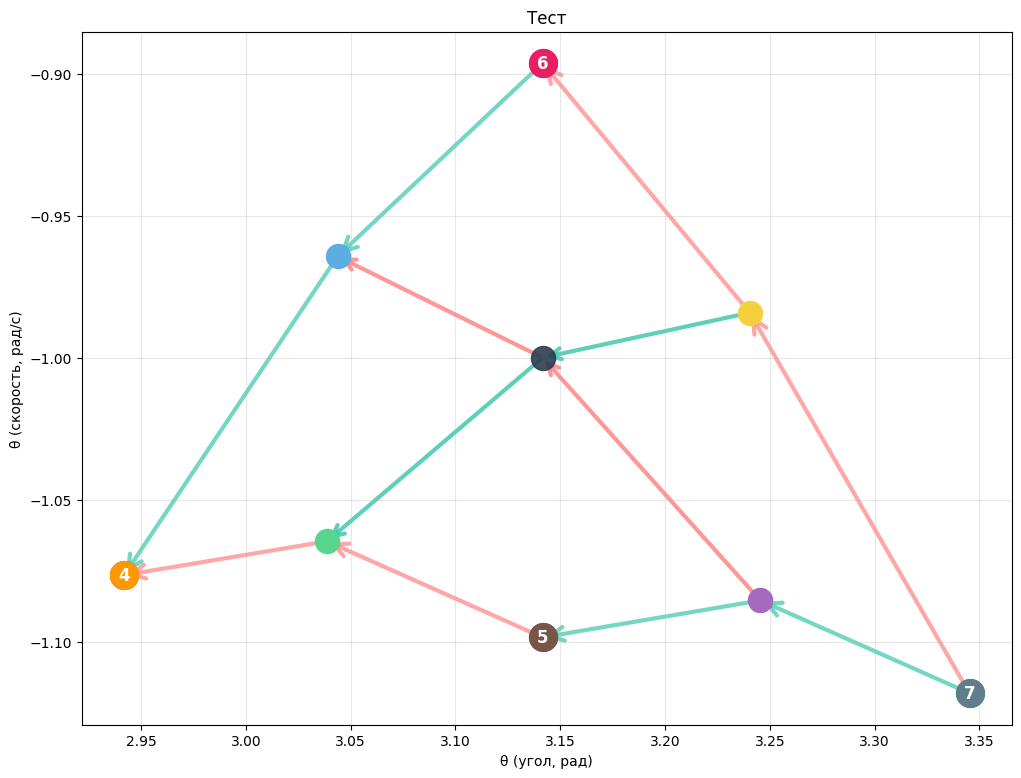

In [64]:
dt_children = np.abs(optimization_results['dt_children'])
dt_grandchildren = np.abs(optimization_results['dt_grandchildren'])

optimized_tree = SporeTree(pendulum, cfg, 
                          dt_children=dt_children, 
                          dt_grandchildren=dt_grandchildren)

visualize_spore_tree(optimized_tree, "–¢–µ—Å—Ç")